# Ordinary Differential Equations

**FIZ228 - Numerical Analysis**  
Dr. Emre S. Tasci, Hacettepe University

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

$\newcommand{\diff}{\text{d}}
\newcommand{\dydx}[2]{\frac{\text{d}#1}{\text{d}#2}}
\newcommand{\ddydx}[2]{\frac{\text{d}^2#1}{\text{d}#2^2}}
\newcommand{\pypx}[2]{\frac{\partial#1}{\partial#2}}
\newcommand{\unit}[1]{\,\text{#1}}$

A differential equation is an equation that involves one or more derivatives of a function as well as the parameters itself. If it consists of a single parameter and its function's derivatives, we label such systems as Ordinary Differential Equations (ODEs). If more than one parameter is involved, then it is called Partial Differential Equations (PDEs).

## Example

Solve the following ODE for the given boundary conditions:

$$\ddydx{x}{t}+5x=0,\quad t\in[0,20]$$

$x(t=0) = 12,\quad x(t=20) = 40$

**Analytical Solution**

_General Solution (verification)_

$$x(t)=A\cos(\omega t + \phi), \quad \omega=\sqrt{5}\\
\ddot{x} = \ddydx{x}{t} = -\omega^2A\cos(\omega t + \phi) = -5x\\
\ddot{x} + 5x = (-5x) + 5x = 0
$$

we also see that the period $T$:

$$T=\frac{2\pi}{\omega}=2.81$$

_Boundary Conditions_

$$x(0) = 12 \rightarrow A\cos(\phi) = 12\quad(1)\\
x(20) = 40\rightarrow A\cos(20\omega + \phi) = A\cos(20\sqrt5+\phi)=40\quad(2)$$

Dividing Eqn. (1) by Eqn. (2) yields:

$$\frac{\cos(\phi)}{\cos(20\sqrt5+\phi)} = \frac{12}{40}=\frac{3}{10}=0.3$$

Using the identity: $\cos(a+b) \equiv \cos(a)\cos(b)-\sin(a)\sin(b)$, we have:

$$\frac{\cos(\phi)}{\cos(20\sqrt5)\cos(\phi)-\sin(20\sqrt5)\sin(\phi)} = 0.3$$

rearranging:

$$\cos(\phi) = 0.3\cos(20\sqrt5)\cos(\phi) - 0.3\sin(20\sqrt5)\sin(\phi)\\
0.3\sin(20\sqrt5)\sin(\phi) = \left(0.3\cos(20\sqrt5)-1\right)\cos(\phi)\\
\frac{\sin(\phi)}{\cos(\phi)}=\frac{0.3\cos(20\sqrt5)-1}{0.3\sin(20\sqrt5)}\\
\phi=\tan^{-1}{\frac{0.3\cos(20\sqrt5)-1}{0.3\sin(20\sqrt5)}}$$

In [2]:
phi = np.arctan2(0.3*np.cos(20*np.sqrt(5))-1,\
                 0.3*np.sin(20*np.sqrt(5)))
print(phi)

-1.3167551744556192


Now that we have $\phi$, we can also calculate the remaining unknown, $A$ using one of the two equations:

$$(1):\quad A = \frac{12}{\cos(\phi)}$$

In [3]:
A = 12/np.cos(phi)
print(A)

47.74837539488783


In [4]:
40/np.cos(20*5**0.5+phi)

47.74837539488792

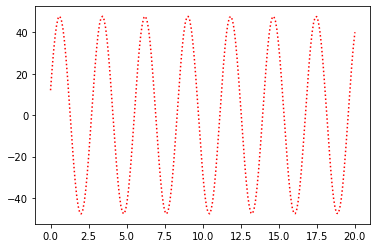

In [5]:
w = np.sqrt(5)

t_a = np.linspace(0,20,200)
x_a = A*np.cos(w*t_a+phi)

plt.plot(t_a,x_a,"r:")
plt.show()

Now let's solve it using the **finite difference method**.

### Finite Difference Method (Derivatives Approximations)

$$y' \approx \frac{y_{i+1}-y_{i-1}}{2h}$$

$$y'' \approx \frac{y_{i-1}-2y_i+y_{i+1}}{h^2}$$


(For the detailed derivations of the approximations, refer to [Programming Lecture Notes](https://emresururi.github.io/FIZ220/FIZ220_EST_UygulamaNotlari_09_FonksiyonTurevIntegral.html) | or in our previous lecture on [Interpolation (Bonus: Finite Difference Method section)](FIZ228_05_Interpolation.md))

$$\ddydx{x}{t}+5x=0,\quad t\in[0,20]$$

$$x(t=0) = 12,\quad x(t=20) = 40$$

<hr>

$$\ddot{x} \approx \frac{x_{i-1}-2x_i+x_{i+1}}{h^2} \\ 
\Rightarrow \frac{x_{i-1}-2x_i+x_{i+1}}{h^2}+5x_i=0\\
{x_{i-1}-2x_i+x_{i+1}}+5x_ih^2=0\\
x_{i-1}+(5h^2-2)x_i+x_{i+1}=0$$

<hr>

$$\begin{align*}i&=0:\quad &x_0+(5h^2-2)x_1+x_2&=0\\
i&=1:\quad &x_1+(5h^2-2)x_2+x_3&=0\\
&\;\;\vdots&\vdots\\
i&=N-3:\quad &x_{N-3}+(5h^2-2)x_{N-2}+x_{N-1}&=0
\end{align*}$$

In [6]:
N = 1000
t = np.linspace(0,20,N)

h = t[1] - t[0]
h2 = h**2

x0 = 12
x_Nm1 = 40

def fun(x):
    eqns = []
    
    # i = 0
    eqns.append(x0+(5*h2-2)*x[0]+x[1])
    
    # i =  1..(N-4)
    for i in range(1,N-3):
        eqns.append(x[i-1]+(5*h2-2)*x[i]+x[i+1])
    
    # i = N-3
    eqns.append(x[N-4]+(5*h2-2)*x[N-3]+x_Nm1)
    
    return eqns

T: 2.8099258924162904


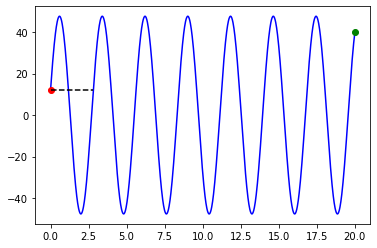

In [7]:
x = optimize.fsolve(fun,np.linspace(x0,x_Nm1,N-2))
x = np.insert(x,0,x0)
x = np.append(x,x_Nm1)

T = 2*np.pi/np.sqrt(5)
print("T:",T)

plt.plot(t,x,"b-")
plt.plot(20,40,"go")
plt.plot(0,x0,"ro")
plt.plot([0,T],[x0,x0],"k--")
plt.show()

Let's compare this analytical solution with our numerical one:

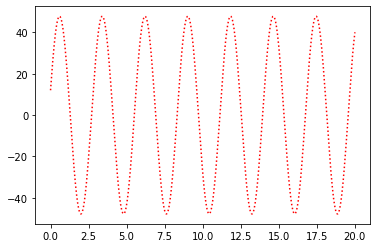

In [8]:
t_a = np.linspace(0,20,200)
x_a = A*np.cos(w*t+phi)

plt.plot(t,x_a,"r:")
plt.show()

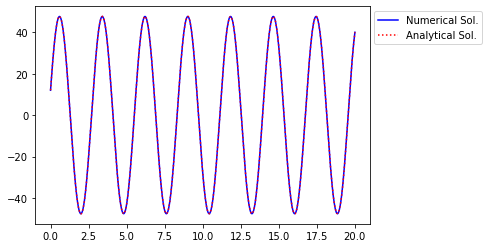

In [9]:
t_a = np.linspace(0,20,200)
x_a = A*np.cos(w*t_a+phi)

plt.plot(t,x,"b-")
plt.plot(t_a,x_a,"r:")
plt.legend(["Numerical Sol.","Analytical Sol."],loc='upper right',\
          bbox_to_anchor=(1.35,1))
plt.show()

## Example

Solve the following ODE for the given boundary conditions:

$$y''+y.y'+3y = \sin(x),\\ y(0) = -1, y(20) = 1.4773, x\in[0,20]$$

We proceed by substituting the above approximations in the differential equations.

$$\Rightarrow y''+y.y'+3y = \sin(x) \\ \approx \frac{y_{i-1}-2y_i+y_{i+1}}{h^2} + y_i \left(\frac{y_{i+1}-y_{i-1}}{2h}\right) + 3 y_i = \sin(x_i)\\ \rightarrow y_{i-1}-2y_i+y_{i+1}+\tfrac{h}{2}y_iy_{i+1}-\tfrac{h}{2}y_iy_{i-1}+3h^2y_i=h^2\sin(x_i) $$

Then we build N-2 equations with N-2 unknowns (unknowns being $y_1,y_2,\dots,y_{N-2}$):

$$
\begin{aligned}
&\begin{array}{ccc}
\hline \hline \text { i } & \text { x_i } & \text { y_i } \\
\hline 0 & x_0=0 & y_0=-1 \\
1 & x_1 & y_1  \\
\vdots & \vdots & \vdots \\
N-2 & x_{N-2} & y_{N-2}\\
N-1 & x_{N-1}=20 & y_{N-1}=1.4773\\
\hline
\end{array}
\end{aligned}$$

We decide $N$ which determines our precision since $h=\frac{x_{N-1} - x_0}{N-1}$, i.e., the higher the number of points taken in between, the smaller the difference between consecutive points.

<hr>

$$\begin{aligned} 
\begin{array}{ccccc}
i=1 &: &\overbrace{y_0}^{-1} - 2y_1 + y_2 + \tfrac{h}{2} y_1 y_2 - \tfrac{h}{2} y_1 \overbrace{y_0}^{-1} + 3h^2 y_1 &= &h^2 \sin(x_1)\\
i=2 &: &y_1 - 2y_2 + y_3 + \tfrac{h}{2} y_2 y_3 - \tfrac{h}{2} y_2 y_1 + 3h^2 y_2 &= &h^2 \sin(x_2)\\
\vdots &: &\vdots &= &\vdots \\
i=N-2 &: &y_{N-3} - 2y_{N-2} + \underbrace{y_{N-1}}_{1.4773} + \tfrac{h}{2} y_{N-2} \underbrace{y_{N-1}}_{1.4773} - \tfrac{h}{2} y_{N-2} y_{N-3} + 3h^2 y_{N-2} &= &h^2 \sin(x_{N-1})
\end{array}
\end{aligned}$$

In [10]:
y_0 = -1
y_Nm1 = 1.4773

N = 250

x = np.linspace(0,20,N)
h = x[1] - x[0]
h2 = h**2

def fun(y):
    yy = np.insert(y,0,y_0)
    yy = np.append(yy,y_Nm1)
    eqns = []
    for i in range(1,N-1):
        eqns.append(yy[i-1]-2*yy[i]+yy[i+1]\
                    +h*yy[i]*yy[i+1]/2-h*yy[i]/2*yy[i-1]\
                    +3*h2*yy[i]-h2*np.sin(x[i]))
    return eqns

In [11]:
y = optimize.fsolve(fun,np.ones(N-2)*(y_Nm1+y_0)/2)
y = np.insert(y,0,y_0)
y = np.append(y,y_Nm1)
#y

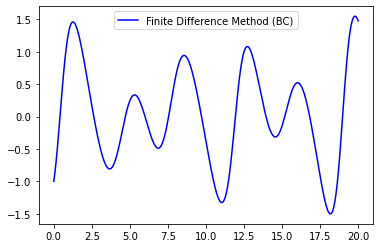

In [12]:
x = np.linspace(0,20,N)
x_FD = x.copy() # For later purposes
y_FD = y.copy() # For later purposes
plt.plot(x,y,"b-")
plt.legend(["Finite Difference Method (BC)"])
plt.show()

![image_1.png](imgs/08_ODEs_Euler.png)  
(Source: Chapra)

## Example

$y'=4e^{0.8t}-0.5y, \;y(t=0)=2$, calculate $y$ for $t\in[0,4]$ with a step size of $h=1$

Analytical solution: 

$$y=\frac{4}{1.3}\left(e^{0.8t} - e^{-0.5t}\right)+2e^{-0.5t}$$

In [13]:
def yp(t,y):
    # The given y'(t,y) equation
    return 4*np.exp(0.8*t)-0.5*y

Let's show that the given analytical solution is indeed the solution. We calculate the left side ($y'$) of the equation using the differentiation of the analytical solution and right side of the equation by directly plugging in the given analytical solution and compare with each other for various $t$ values.

In [14]:
def dy(t):
    # y' from the analytical solution
    return 4/1.3*(0.8*np.exp(0.8*t)+0.5*np.exp(-0.5*t))-np.exp(-0.5*t)

In [15]:
def y_t(t):
    # true y function (analytical solution)
    return 4/1.3*(np.exp(0.8*t)-np.exp(-0.5*t))+2*np.exp(-0.5*t)

In [16]:
t = np.arange(0,10,0.5)
yp1 = dy(t)
yp2 = 4*np.exp(0.8*t)-0.5*y_t(t)
for tt,i,j in zip(t,yp1,yp2):
    print("{:.1f}: {:10.4f}, {:10.4f}".format(tt,i,j))

0.0:     3.0000,     3.0000
0.5:     4.0915,     4.0915
1.0:     5.8048,     5.8048
1.5:     8.4269,     8.4269
2.0:    12.3902,    12.3902
2.5:    18.3427,    18.3427
3.0:    27.2541,    27.2541
3.5:    40.5727,    40.5727
4.0:    60.4606,    60.4606
4.5:    90.1447,    90.1447
5.0:   134.4396,   134.4396
5.5:   200.5289,   200.5289
6.0:   299.1294,   299.1294
6.5:   446.2295,   446.2295
7.0:   665.6813,   665.6813
7.5:   993.0682,   993.0682
8.0:  1481.4746,  1481.4746
8.5:  2210.0933,  2210.0933
9.0:  3297.0663,  3297.0663
9.5:  4918.6407,  4918.6407


It is even easier to see that the given analytic solution is indeed the solution via plotting both sides of the equation together:

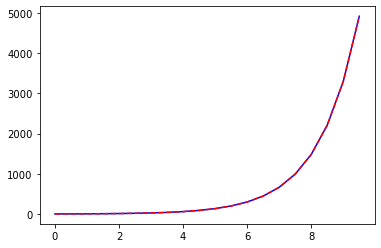

In [17]:
plt.plot(t,yp1,"b",t,yp2,"--r")
plt.show()

**Solving the ODE using Euler Method:**

In [18]:
t = np.arange(1,5)
h = t[1] - t[0]
y = [2]

print("{:>2s}\t{:>8s}\t{:^8s}\t{:>5s}"\
      .format("t","y_Euler","y_true","Err%"))

print("{:>2d}\t{:8.5f}\t{:8.5f}\t{:5.2f}%"\
      .format(0,y[0],y_t(0),np.abs(y_t(0)-y[0])/y_t(0)*100))
for i in t:
    slope = yp(i-1,y[i-1])
    y.append(y[i-1]+slope*h)
    print("{:>2d}\t{:8.5f}\t{:8.5f}\t{:5.2f}%"\
      .format(i,y[i],y_t(i),np.abs(y_t(i)-y[i])/y_t(i)*100))

 t	 y_Euler	 y_true 	 Err%
 0	 2.00000	 2.00000	 0.00%
 1	 5.00000	 6.19463	19.28%
 2	11.40216	14.84392	23.19%
 3	25.51321	33.67717	24.24%
 4	56.84931	75.33896	24.54%


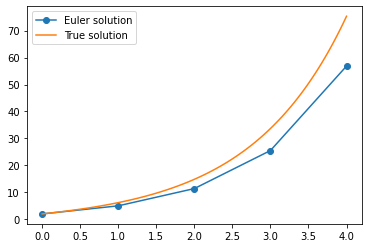

In [19]:
plt.plot(range(5),y,"-o",\
         np.linspace(0,4,100),y_t(np.linspace(0,4,100)),"-")
plt.legend(["Euler solution","True solution"])
plt.show()

# Runge-Kutta Method
**(4th order Runge-Kutta: RK4)**

$$y_{i+1} = y_i+\frac{1}{6}\left(k_1+2k_2+2k_3+k_4\right)h$$

where:

$$k_1 = f(t_i,y_i)\\
k_2= f(t_i+\tfrac{1}{2}h,y_i+\tfrac{1}{2}k_1 h)\\
k_3= f(t_i+\tfrac{1}{2}h,y_i+\tfrac{1}{2}k_2 h)\\
k_4 = f(t_i+h,y_i+k_3 h)$$

![image_2.png](imgs/08_ODEs_RK4.png) 
[Image: Wikipedia](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods#/media/File:Runge-Kutta_slopes.svg)

## Example

$y'=4e^{0.8t}-0.5y$, $y(t=0)=2$, calculate $y$ for $t\in[0,4]$ with a step size of $h=1$

Analytical solution: 

$$y=\frac{4}{1.3}\left(e^{0.8t} - e^{-0.5t}\right)+2e^{-0.5t}$$

In [20]:
def f(t,y):
    return 4*np.exp(0.8*t) - 0.5*y

In [21]:
def y_t(t):
    return 4/1.3*((np.exp(0.8*t)-np.exp(-0.5*t)))+2*np.exp(-0.5*t)

In [22]:
y = [2]
t = np.arange(5)
h = t[1]-t[0]
print("{:>2s}\t{:>8s}\t{:^8s}\t{:>5s}"\
      .format("t","y_KR4","y_true","Err%"))
for i in range(1,5):
    k1 = f(t[i-1],y[i-1])
    k2 = f(t[i-1]+0.5*h,y[i-1]+0.5*k1*h)
    k3 = f(t[i-1]+0.5*h,y[i-1]+0.5*k2*h)
    k4 = f(t[i-1]+h,y[i-1]+k3*h)
    y.append(y[i-1]+(k1+2*k2+2*k3+k4)*h/6)

for i in range(len(y)):
    print("{:>2d}\t{:8.5f}\t{:8.5f}\t{:5.2f}%"\
      .format(i,y[i],y_t(i),np.abs(y_t(i)-y[i])/y_t(i)*100))

 t	   y_KR4	 y_true 	 Err%
 0	 2.00000	 2.00000	 0.00%
 1	 6.20104	 6.19463	 0.10%
 2	14.86248	14.84392	 0.13%
 3	33.72135	33.67717	 0.13%
 4	75.43917	75.33896	 0.13%


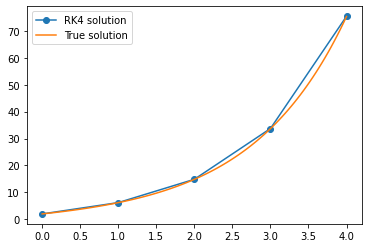

In [23]:
plt.plot(range(5),y,"-o",\
         np.linspace(0,4,100),y_t(np.linspace(0,4,100)),"-")
plt.legend(["RK4 solution","True solution"])
plt.show()

## Example

Solve for the velocity and position of the free-falling bungee jumper assuming at $t=0$, $x=0,\;v=0$ for $t\in[0,10]$ with a step size of 2 seconds.

**Equations**

$$v=\dydx{x}{t}\\
\dydx{v}{t} = g - \frac{C_d}{m}v^2$$

**Values:**
$g=9.81\unit{ m/s}^2$, $m=68.1 \unit{kg}$, $C_d = 0.25 \unit{kg/m}$

**Analytical solution:** 

$$x(t)=\frac{\ln\left(\cosh{\sqrt{\frac{gC_d}{m}}t}\right)}{C_d/m}$$
[Source: WolframAlpha](https://www.wolframalpha.com/input?i=y%27%27%28t%29+-+a+%2Bb*y%27%28t%29**2+%3D+0%2C+y%280%29%3D0%2Cy%27%280%29%3D0)

$$v(t) =\dydx{x}{t} =\sqrt{\frac{mg}{C_d}}\tanh\left(\sqrt{\frac{gC_d}{m}}t\right)$$
[Source: WolframAlpha](https://www.wolframalpha.com/input?i=derivative+of+ln%28cosh%28sqrt%28gC%2Fm%29*t%29%29%2F%28C%2Fm%29)

In [24]:
g = 9.81 # m/s^2
m = 68.1 # kg
C_d = 0.25 # kg/m

def f(t,v):
    return g - C_d/m*v**2

N = 6

### Euler

In [25]:
t_Euler = np.linspace(0,10,N)
h = t_Euler[1]-t_Euler[0]
x_Euler  = np.array([0])
v_Euler = np.array([0])

for ti in t_Euler[:-1]:
    v_ip1 = v_Euler[-1] + f(ti,v_Euler[-1])*h
    x_ip1  = x_Euler[-1]  + v_ip1*h
    v_Euler = np.append(v_Euler,v_ip1)
    x_Euler = np.append(x_Euler,x_ip1)

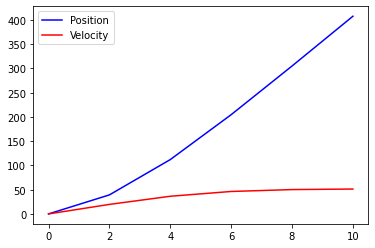

In [26]:
plt.plot(t_Euler,x_Euler,"-b",t_Euler,v_Euler,"-r")
plt.legend(("Position","Velocity"))
plt.show()

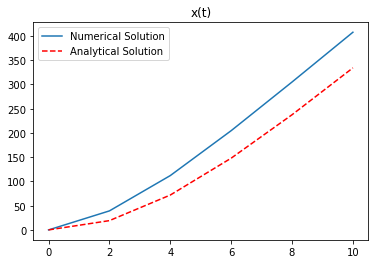

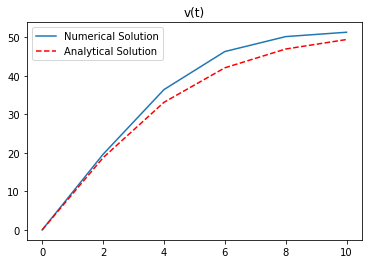

In [27]:
def x_a(t):
    # Analytical Solution
    return np.log(np.cosh(np.sqrt(g*C_d/m)*t))/(C_d/m)

def v_a(t):
    # Analytical Solution
    return np.sqrt(g*m/C_d)*np.tanh(np.sqrt(g*C_d/m)*t)

plt.plot(t_Euler,x_Euler,"-",t_Euler,x_a(t_Euler),"--r")
plt.title("x(t)")
plt.legend(["Numerical Solution","Analytical Solution"])
plt.show()

plt.plot(t_Euler,v_Euler,"-",t_Euler,v_a(t_Euler),"--r")
plt.title("v(t)")
plt.legend(["Numerical Solution","Analytical Solution"])
plt.show()

### RK4

In [28]:
N = 6
t_aux = np.linspace(0,10,N)
h = t_aux[1]-t_aux[0]

t_RK4 = np.array([0])
x_RK4 = np.array([0])
v_RK4 = np.array([0])

for i in range(len(t_aux)-1):
    k1 = f(t[i],v_RK4[i])
    k2 = f(t[i]+0.5*h,v_RK4[i]+0.5*k1*h)
    k3 = f(t[i]+0.5*h,v_RK4[i]+0.5*k2*h)
    k4 = f(t[i]+0.5*h,v_RK4[i]+k3*h)
    v_ip1 = v_RK4[i] + (k1+2*k2+2*k3+k4)*h/6
    x_ip1 = x_RK4[i]  + v_RK4[i]*h
    
    v_RK4 = np.append(v_RK4,v_ip1)
    x_RK4 = np.append(x_RK4,x_ip1)
    t_RK4 = np.append(t_RK4,t_RK4[i]+h)

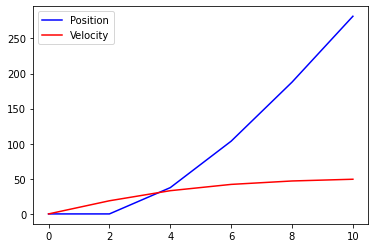

In [29]:
plt.plot(t_RK4,x_RK4,"-b",t_RK4,v_RK4,"-r")
plt.legend(("Position","Velocity"))
plt.show()

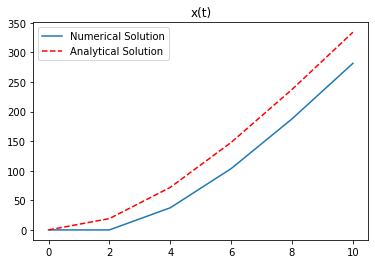

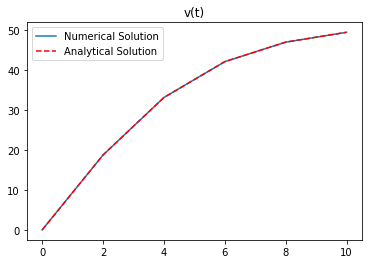

In [30]:
plt.plot(t_RK4,x_RK4,"-",t_RK4,x_a(t_RK4),"--r")
plt.title("x(t)")
plt.legend(["Numerical Solution","Analytical Solution"])
plt.show()

plt.plot(t_RK4,v_RK4,"-",t_RK4,v_a(t_RK4),"--r")
plt.title("v(t)")
plt.legend(["Numerical Solution","Analytical Solution"])
plt.show()

Even though the velocity fits very good, there is a discrepancy concerning the position. This is due the fact that we have derived the positions from its derivative (i.e., $v$):

$$ x_{i+1} = x_i + v_i h$$

where $h$ is of course, our $\Delta t$.

We can further refine our findings by also considering the acceleration (i.e., $\dot v$) and extending our formula to include that:

$$ x_{i+1} = x_i + v_i h + \frac{1}{2}\left(\frac{v_{i+1}-v_i}{h}\right)  h^2$$

So, implementing this additional factor, we have:

In [31]:
N = 6
t_aux = np.linspace(0,10,N)
h = t_aux[1]-t_aux[0]

t_wa = np.array([0])
x_RK4_wa = np.array([0]) # This is position calculated with a
v_RK4_wa = np.array([0]) # No change in velocity's equation

for i in range(len(t_aux)-1):
    k1 = f(t[i],v_RK4_wa[i])
    k2 = f(t[i]+0.5*h,v_RK4_wa[i]+0.5*k1*h)
    k3 = f(t[i]+0.5*h,v_RK4_wa[i]+0.5*k2*h)
    k4 = f(t[i]+0.5*h,v_RK4_wa[i]+k3*h)
    v_ip1 = v_RK4_wa[i] + (k1+2*k2+2*k3+k4)*h/6
    x_wa_ip1 = x_RK4_wa[i]  + v_RK4_wa[i]*h\
               + 0.5*((v_ip1 - v_RK4_wa[i])/h)*h**2
    
    v_RK4_wa = np.append(v_RK4_wa,v_ip1)
    x_RK4_wa = np.append(x_RK4_wa,x_wa_ip1)
    t_wa = np.append(t_wa,t_wa[i]+h)

Comparing this approach with the previous one & the analytical solution:

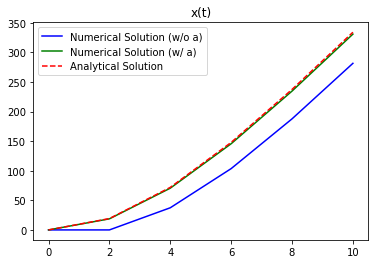

In [32]:
plt.plot(t_RK4,x_RK4,"b-",t_wa,x_RK4_wa,"g-",t_RK4,x_a(t_RK4),"--r")
plt.title("x(t)")
plt.legend(["Numerical Solution (w/o a)",
            "Numerical Solution (w/ a)",
            "Analytical Solution"])
plt.show()

### Comparison of Euler & RK4

In [33]:
t = np.linspace(0,10,N)

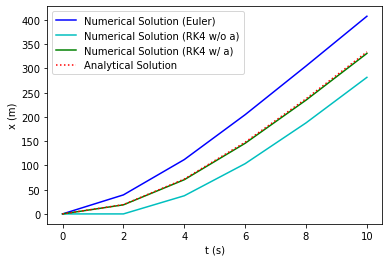

In [34]:
plt.plot(t_Euler,x_Euler,"-b",t_RK4,x_RK4,"-c",t_wa,x_RK4_wa,"-g",t,x_a(t),":r")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.legend(["Numerical Solution (Euler)",
            "Numerical Solution (RK4 w/o a)",
            "Numerical Solution (RK4 w/ a)",
            "Analytical Solution"])
plt.show()

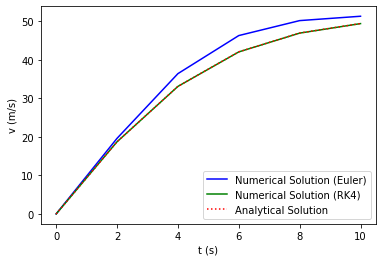

In [35]:
plt.plot(t_Euler,v_Euler,"-b",t_RK4,v_RK4,"-g",t,v_a(t),":r")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.legend(["Numerical Solution (Euler)",
            "Numerical Solution (RK4)",
            "Analytical Solution"])
plt.show()

## Runge-Kutta implemented in Scipy

Scipy comes with an initial value problem solver: [scipy.integrate.solve_ivp()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp). By default, it uses the most popular version of RK, the RK45 that has been derived by blending RK4 and RK5.

It solves problems given in the form:

$$\dydx{y}{t} = f(t,y)$$

with the initial value $y(t_0) = y_0$ and the boundaries $t\in[t_i,t_f]$ given.

Its basic format is:

`solve_ivp(f,t_range,y0)`

and it returns -among other information- the `t` and `y` properties for the solution.

Let's solve our bungee-jumper problem, this time via the built-in solver:

In [36]:
from scipy import integrate

In [37]:
# Re-define our ODE for practicality

g = 9.81 # m/s^2
m = 68.1 # kg
C_d = 0.25 # kg/m

def f_ivp(t,v):
    return g - C_d/m*v**2

```{note}
As the solver supports multi-variable/vector inputs, the initial value(s) should be entered as an array.
```

In [38]:
RK_solution = integrate.solve_ivp(f_ivp,[0,10],[0])
RK_solution

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 56
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00000000e-04, 1.10000000e-03, 1.11000000e-02,
       1.11100000e-01, 1.11110000e+00, 5.62593689e+00, 8.82358079e+00,
       1.00000000e+01])
 t_events: None
        y: array([[0.00000000e+00, 9.81000000e-04, 1.07909998e-02, 1.08890839e-01,
        1.08972954e+00, 1.07411772e+01, 4.07662263e+01, 4.81903652e+01,
        4.94243657e+01]])
 y_events: None

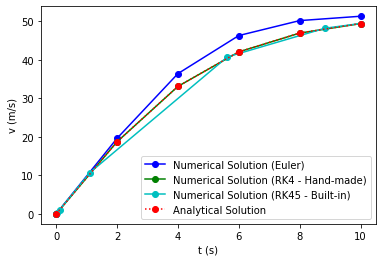

In [39]:
t = np.linspace(0,10,N)

ivp_t = RK_solution.t
ivp_y = RK_solution.y[0]

plt.plot(t_Euler,v_Euler,"-bo",
         t_RK4,v_RK4,"-go",
         ivp_t,ivp_y,"-co",
         t,v_a(t),":ro")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.legend(["Numerical Solution (Euler)",
            "Numerical Solution (RK4 - Hand-made)",
            "Numerical Solution (RK45 - Built-in)",
            "Analytical Solution"])
plt.show()

In the graph we see that the built-in RK45 solver determines its data points internally. We can increase the number of data considered by demanding higher accuracy via `atol` and `rtol` tolerance parameters:

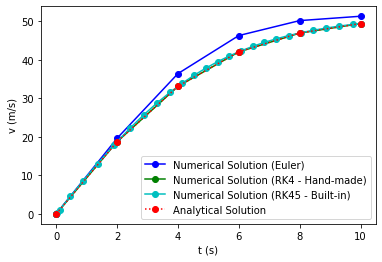

In [40]:
RK_solution = integrate.solve_ivp(f_ivp,[0,10],[0],atol=1E-8,rtol=1E-8)

t = np.linspace(0,10,N)

ivp_t = RK_solution.t
ivp_y = RK_solution.y[0]

plt.plot(t_Euler,v_Euler,"-bo",
         t_RK4,v_RK4,"-go",
         ivp_t,ivp_y,"-co",
         t,v_a(t),":ro")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.legend(["Numerical Solution (Euler)",
            "Numerical Solution (RK4 - Hand-made)",
            "Numerical Solution (RK45 - Built-in)",
            "Analytical Solution"])
plt.show()

## Example: 1st order ODE via Euler

$$y' = y, y(0) = 1$$

**Analytical Solution:** $y(x) = e^x$

In [41]:
def f(t,y):
    return y

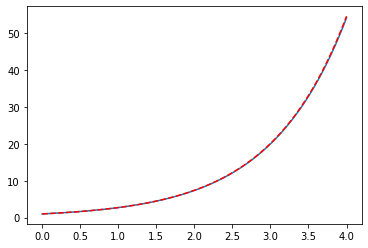

In [42]:
t = np.linspace(0,4,1000)
h = t[1] - t[0]
y = np.array([1])

for tt in t[:-1]:
    y_ip1 = y[-1] + f(tt,y[-1]) * h
    #print(y_ip1)
    y = np.append(y,y_ip1)

plt.plot(t,y,"-",t,np.exp(t),"--r")
plt.show()

## Example: 2nd order ODE via Euler $y''=f(y)$

$$y'' = y, y(0) = 1, y'(0) = 1$$

**Analytical Solution:** $y(x) = e^x$

In [43]:
def f(x,y,yp):
    # y'' = f(x,y,yp)
    return y

In [44]:
x = np.linspace(0,4,100)
h = x[1] - x[0]

y = np.array([1])
yp = np.array([1])

for xx in x[:-1]:
    yp_ip1 = yp[-1] + f(x[-1],y[-1],yp[-1]) *h
    yp = np.append(yp,yp_ip1)
    y_ip1 = y[-1] + yp_ip1 * h
    y = np.append(y,y_ip1)

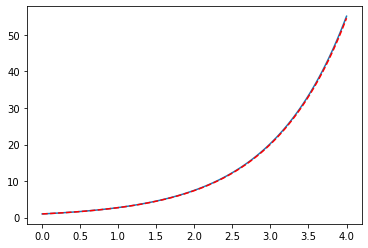

In [45]:
plt.plot(x,y,"-",x,np.exp(x),"--r")
plt.show()

## Example: 2nd Order ODE via Euler $y'' = f(y,y')$

$$y''+ y' -6y=0, y(0) = 8, y'(0)=-9$$

**Analytical Solution:** $y(x) = 3e^{2x} + 5e^{-3x}$

In [46]:
def f(x,y,yp):
    # y'' = f(x,y,yp)
    return 6*y - yp

In [47]:
x = np.linspace(0,4,1000)
h = x[1] - x[0]

y = np.array([8])
yp = np.array([-9])

for xx in x[:-1]:
    yp_ip1 = yp[-1] + f(x[-1],y[-1],yp[-1]) *h
    yp = np.append(yp,yp_ip1)
    y_ip1 = y[-1] + yp_ip1 * h
    y = np.append(y,y_ip1)

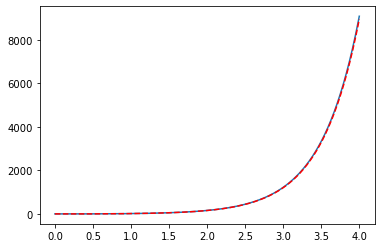

In [48]:
plt.plot(x,y,"-",x,3*np.exp(2*x)+5*np.exp(-3*x),"--r")
plt.show()

## Example: 2nd Order ODE (initial conditions)
[Gilberto E. Urroz](https://en.smath.com/wiki/GetFile.aspx?File=Examples/RK4-2ndOrderODE.pdf)

$$y''+y.y'+3y = \sin(x), y(0) = -1, y'(0) = 1, x\in[0,20]$$

In [49]:
def f(x,y,yp):
    # y'' = f(x,y,yp)
    return np.sin(x)-3.*y-y*yp

### Euler

In [50]:
x = np.linspace(0,20,350)
h = x[1] - x[0]

y = np.array([-1])
yp = np.array([1])

for i in range(x.size-1):
    yp_ip1 = yp[-1] + f(x[i],y[-1],yp[-1]) *h
    yp = np.append(yp,yp_ip1)
    y_ip1 = y[-1] + yp_ip1 * h
    y = np.append(y,y_ip1)

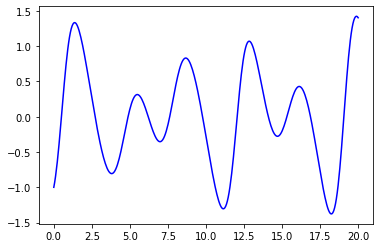

In [51]:
x_Euler = x.copy()
y_Euler = y.copy()
plt.plot(x,y,"-b")
plt.show()

### RK4

In [52]:
x = np.linspace(0,20,350)
h = x[1] - x[0]

y = np.array([-1])
yp = np.array([1])

for i in range(x.size-1):
    k1 = f(x[i],y[-1],yp[-1])
    k2 = f(x[i]+0.5*h,y[-1],yp[-1]+0.5*k1*h)
    k3 = f(x[i]+0.5*h,y[-1],yp[-1]+0.5*k2*h)
    k4 = f(x[i]+h,y[-1],yp[-1]+k3*h)
    yp_ip1 = yp[-1]+(k1+2*k2+2*k3+k4)*h/6
    yp = np.append(yp,yp_ip1)

    y_ip1 = y[-1] + yp_ip1 * h
    y = np.append(y,y_ip1)

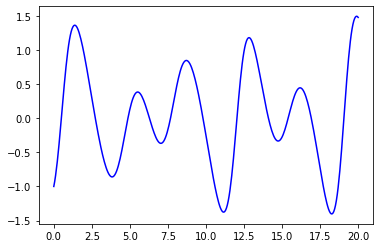

In [53]:
x_RK = x.copy()
y_RK = y.copy()
plt.plot(x,y,"-b")
#plt.plot(x,yp,"-r")
plt.show()

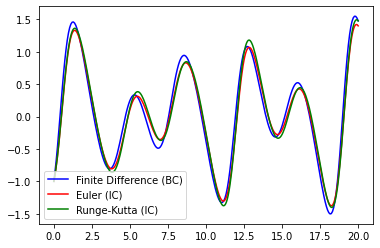

In [54]:
plt.plot(x_FD,y_FD,"-b")
plt.plot(x_Euler,y_Euler,"-r")
plt.plot(x_RK,y_RK,"-g")
plt.legend(["Finite Difference (BC)","Euler (IC)","Runge-Kutta (IC)"])
plt.show()

### Example: 2nd Order ODE (boundary conditions, linear)

$$y'' + y' -6y=0, y(0) = 8, y(4)=8942.874,\,x\in[0,4]$$

**Analytical Solution:** $y(x) = 3e^{2x} + 5e^{-3x}$

#### Finite Difference Method

$$y'' \approx \frac{y_{i-1}-2y_i+y_{i+1}}{h^2}$$

$$y' \approx \frac{y_{i+1}-y_{i-1}}{h}$$

$$\Rightarrow y''+y'-6y = 0 \\
\approx \frac{y_{i-1}-2y_i+y_{i+1}}{h^2} + \left(\frac{y_{i+1}-y_{i-1}}{h}\right) -6 y_i = 0$$

$$\rightarrow y_{i-1}-2y_i+y_{i+1}+hy_{i+1}-hy_{i-1}-6h^2y_i=0\\
(1-h)y_{i-1}-(2+6h^2)y_i+(1+h)y_{i+1} = 0$$

<hr>

$$\begin{aligned} 
\begin{array}{ccccc}
i=1 &: &(1-h)\overbrace{y_0}^{8} - (2+6h^2)y_1 + (1+h)y_2 &= &0\\
i=2 &: &(1-h)y_1 - (2+6h^2)y_2 + (1+h)y_3 &= &0\\
\vdots &: &\vdots &= &\vdots \\
i=N-2 &: &(1-h)y_{N-3} - (2+6h^2)y_{N-2} + (1+h)\underbrace{y_{N-1}}_{8942.874} &= &0
\end{array}
\end{aligned}$$

$$\begin{bmatrix} -(2+6h^2) & (1+h) & 0 & 0 & 0 & \dots & 0 & 0 & 0\\
(1-h) & -(2+6h^2) & (1+h) & 0 & 0 & \dots & 0 & 0 & 0\\
0 & (1-h) & -(2+6h^2) & (1+h) & 0 & \dots & 0 & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & 0 & 0 & \dots & 0 &(1-h) & -(2+6h^2)
\end{bmatrix}
\begin{bmatrix} y_1 \\ y_2 \\ y_3 \\ \vdots \\y_{N-2}
\end{bmatrix}=
\begin{bmatrix} -(1-h)y_0 \\ 0 \\ 0 \\ \vdots \\-(1+h)y_{N-1}
\end{bmatrix}
$$

In [55]:
y_0 = 8
y_Nm1 = 8942.873991846245

N = 300
x = np.linspace(0,4,N)
h = x[1] - x[2]

ones = np.ones(N-2)
A = np.diag(ones*-(2+6*h**2))\
   +np.diag(ones*(1+h),1)[:-1,:-1]\
   +np.diag(ones*(1-h),-1)[:-1,:-1]
#print(A)

b = np.zeros((N-2,1))
b[0, 0] = -(1-h)*y_0
b[-1,0] = -(1+h)*y_Nm1
#print(b)

y = np.linalg.solve(A,b)
#print(y)
y = np.insert(y,0,y_0)
y = np.append(y,y_Nm1)
#print(y)

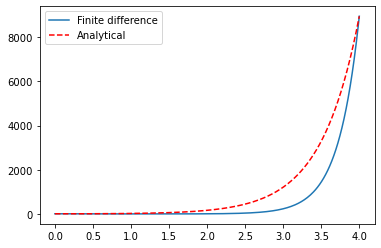

In [56]:
plt.plot(x,y,"-",x,3*np.exp(2*x)+5*np.exp(-3*x),"--r")
plt.legend(("Finite difference","Analytical"))
plt.show()

### Example: 2nd Order ODE (boundary conditions, linear)

$$y'' + y -\cos(x)=0, y(0) = 1, y(10)=-0.5,\,x\in[0,10]$$

**[Analytical Solution](https://www.wolframalpha.com/input?i2d=true&i=y%27%27%2By-cos%5C%2840%29x%5C%2841%29%3D0%5C%2844%29y%5C%2840%290%5C%2841%29%3D1%5C%2844%29y%5C%2840%2910%5C%2841%29%3D-0.5):** $y(x) = (0.5x - 5.62327)\sin(x) + \cos(x)$

$$\frac{y_{i-1}-2y_i+y_{i+1}}{h^2} + y_i -\cos(x_i)= 0$$

$$y_{i-1} - (2-h^2)y_i + y_{i+1} -h^2\cos(x_i)= 0$$

Boundary conditions:

$$x_0 = 0 : y_0 = 1\\x_{N-1}=10:y_{N-1} =-0.5$$

$$\begin{aligned} 
\begin{array}{ccccc}
i=1 &: &\overbrace{y_0}^{1} - (2-h^2)y_1 + y_2 &= &h^2\cos(x_1)\\
i=2 &: &y_1 - (2-h^2)y_2 + y_3 &= &h^2\cos(x_2)\\
\vdots &: &\vdots &= &\vdots \\
i=N-2 &: &y_{N-3} - (2-h^2)y_{N-2} + \underbrace{y_{N-1}}_{-0.5} &= &h^2\cos(x_{N-2})
\end{array}
\end{aligned}$$

$$\begin{bmatrix} -(2-h^2) & 1 & 0 & 0 & 0 & \dots & 0 & 0 & 0\\
1 & -(2-h^2) & 1 & 0 & 0 & \dots & 0 & 0 & 0\\
0 & 1 & -(2-h^2) & 1 & 0 & \dots & 0 & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & 0 & 0 & \dots & 0 &1 & -(2-h^2)
\end{bmatrix}
\begin{bmatrix} y_1 \\ y_2 \\ y_3 \\ \vdots \\y_{N-2}
\end{bmatrix}=
\begin{bmatrix} h^2\cos(x_1)-y_0 \\ h^2\cos(x_2) \\ h^2\cos(x_3) \\ \vdots \\h^2\cos(x_{N-2})-y_{N-1}
\end{bmatrix}
$$

In [57]:
y_0 = 1
y_Nm1 = -0.5

N = 100
x = np.linspace(0,10,N)
h = x[1] - x[2]

ones = np.ones(N-2)
A = np.diag(ones*-(2-h**2))\
   +np.diag(ones,1)[:-1,:-1]\
   +np.diag(ones,-1)[:-1,:-1]
#print(A)

b =np.empty((N-2,1))
b[:,0] = h**2*np.cos(x[1:N-1])
b[0, 0] -= y_0
b[-1,0] -= y_Nm1
#print(b)

y = np.linalg.solve(A,b)
#print(y)
y = np.insert(y,0,y_0)
y = np.append(y,y_Nm1)
#print(y)

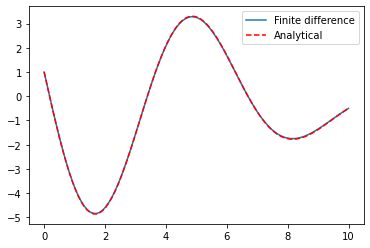

In [58]:
plt.plot(x,y,"-",x,(0.5*x-5.62327)*np.sin(x)+np.cos(x),"--r")
plt.legend(("Finite difference","Analytical"))
plt.show()

# References
* Steven C. Chapra, "Applied Numerical Methods with MATLAB for Engineers and Scientists" 3rd Ed. McGraw Hill, 2012
* Eda Çelik Akdur, KMU231 Lecture Notes
* [Gilberto E. Urroz](https://en.smath.com/wiki/GetFile.aspx?File=Examples/RK4-2ndOrderODE.pdf)
* Cüneyt Sert, [ME310 Lecture Notes](http://users.metu.edu.tr/csert/me310/me310_9_ODE.pdf)